In [1]:
import networkx as nx
import pandas as pd
import numpy as np

In [4]:
import gzip

path = 'data/ca-HepTh/ca-HepTh.txt.gz'

# خواندن مستقیم فایل gz شده
with gzip.open(path, "rt") as f:
    G_ca = nx.read_edgelist(f, comments="#", delimiter="\t")

In [5]:
# لیست گراف‌های واقعی برای تحلیل
# بارگذاری گراف‌ها
graphs_real = [
    ("Karate Club", nx.karate_club_graph()),                     # شبکه اجتماعی باشگاه کاراته
    ("Les Miserables", nx.les_miserables_graph()),              # شبکه شخصیت‌های داستان بینوایان
    ("Florentine Families", nx.florentine_families_graph()),    # خانواده‌های فلورانس
    ("CA-HepTh", G_ca)  # همکاری علمی
]

In [6]:
# ذخیره اطلاعات جدول
table_a = []

In [7]:
# محاسبه پارامترها
for name, G in graphs_real:
    N = G.number_of_nodes()
    L = G.number_of_edges()
    avg_k = sum(dict(G.degree()).values()) / N
    ln_N = round(np.log(N), 2)

    table_a.append({
        "network": name,
        "N": N,
        "L": L,
        "<k>": round(avg_k, 2),
        "ln(N)": ln_N
    })

In [8]:
# تبدیل به دیتافریم و نمایش
df_a = pd.DataFrame(table_a)
print("📊 جدول بخش (الف):")
df_a

📊 جدول بخش (الف):


,network,N,L,<k>,ln(N)
0,Karate Club,34,78,4.59,3.53
1,Les Miserables,77,254,6.60,4.34
2,Florentine Families,15,20,2.67,2.71
3,CA-HepTh,9877,25998,5.26,9.20


In [9]:
# لیست برای ذخیره نتایج
table_b = []

In [10]:
# تحلیل گراف‌ها
for name, G in graphs_real:
    N = G.number_of_nodes()
    L = G.number_of_edges()
    k_avg = sum(dict(G.degree()).values()) / N
    lnN_lnk = round(np.log(N) / np.log(k_avg), 2)

    # بررسی اتصال
    if nx.is_connected(G):
        d_avg = round(nx.average_shortest_path_length(G), 3)
        d_max = nx.diameter(G)
    else:
        # استفاده از بزرگترین component
        Gc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        d_avg = round(nx.average_shortest_path_length(Gc), 3)
        d_max = nx.diameter(Gc)

    table_b.append({
        "network": name,
        "N": N,
        "L": L,
        "<k>": round(k_avg, 2),
        "<d>": d_avg,
        "dmax": d_max,
        "ln(N)/ln(k)": lnN_lnk
    })


In [11]:
# ساخت جدول
df_b = pd.DataFrame(table_b)
print("📊 جدول بخش (ب):")
df_b

📊 جدول بخش (ب):


,network,N,L,<k>,<d>,dmax,ln(N)/ln(k)
0,Karate Club,34,78,4.59,2.408,5,2.31
1,Les Miserables,77,254,6.60,2.641,5,2.30
2,Florentine Families,15,20,2.67,2.486,5,2.76
3,CA-HepTh,9877,25998,5.26,5.945,18,5.54


In [12]:
import matplotlib.pyplot as plt

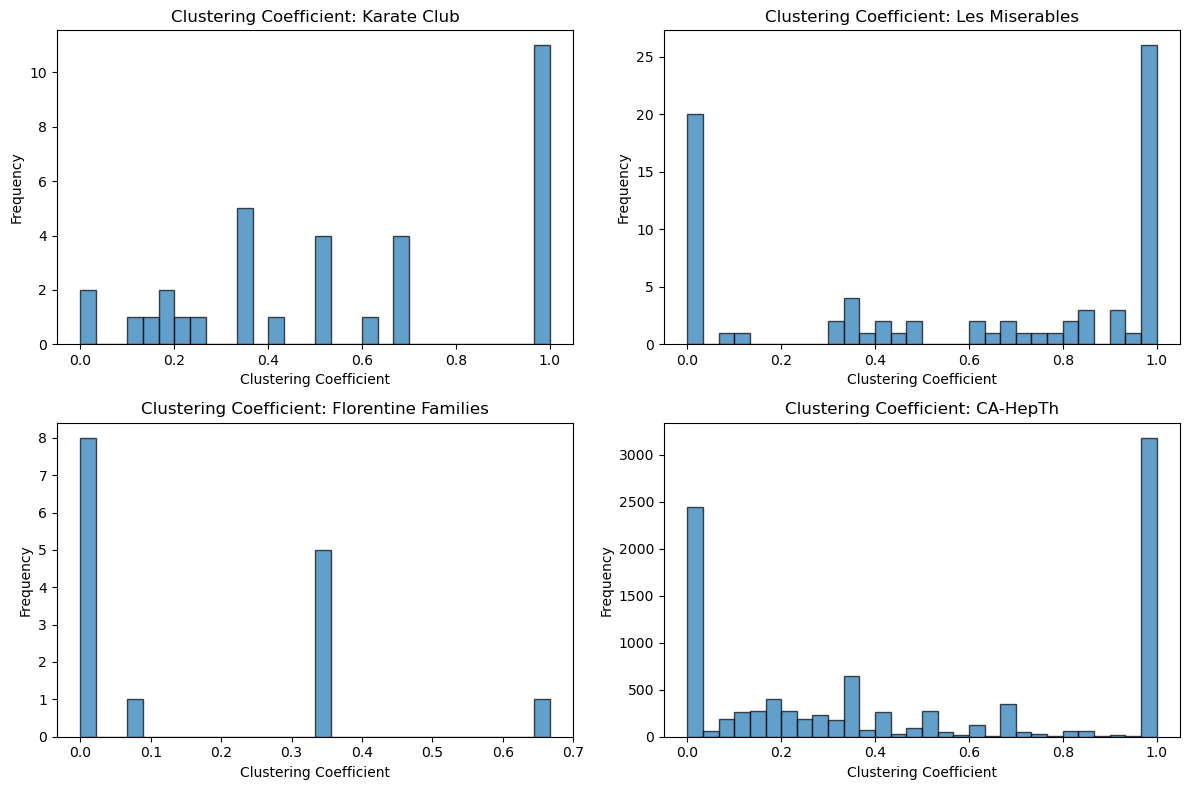

In [13]:
# رسم نمودارهای ضریب خوشه‌بندی
plt.figure(figsize=(12, 8))

for i, (name, G) in enumerate(graphs_real, 1):
    # محاسبه ضریب خوشه‌بندی برای همه گره‌ها
    clustering_coeff = list(nx.clustering(G).values())

    # رسم نمودار
    plt.subplot(2, 2, i)
    plt.hist(clustering_coeff, bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Clustering Coefficient: {name}")
    plt.xlabel("Clustering Coefficient")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()